In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [3]:
df = pd.read_csv('kindle_reviews.csv')
df = df.rename(columns={'Unnamed: 0': 'Id'})

print('Data Set Shape = {}'.format(df.shape))
print('Data Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
print(df.columns)

Data Set Shape = (982619, 10)
Data Set Memory Usage = 74.97 MB
Index(['Id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


# Cardinality

In [4]:
print("Number of unique books: {}".format(df['asin'].nunique()))
print("Number of unique reviewers: {}".format(df['reviewerID'].nunique()))

Number of unique books: 61934
Number of unique reviewers: 68223


In [5]:
reviewsperbook = df.groupby('asin')['overall'].value_counts(dropna=False)

#Build stacked bar histogram if possible

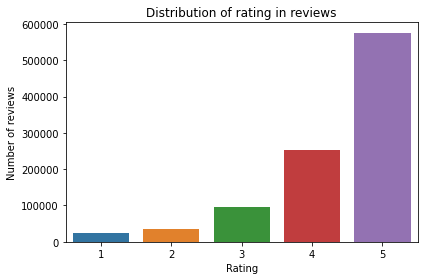

In [6]:
distribution = df['overall'].value_counts(dropna=False)

fig = sns.barplot(distribution.index, distribution)
fig.set(xlabel='Rating', ylabel='Number of reviews', title="Distribution of rating in reviews")
fig.get_figure().tight_layout()
fig.get_figure().savefig("Distributuon_of_rating.png")

# Meta Features

In [7]:
df['punctuation'] = df['reviewText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Id                29
asin              29
helpful           29
overall           29
reviewText        29
reviewTime        29
reviewerID        29
reviewerName      29
summary           29
unixReviewTime    29
punctuation       29
dtype: int64


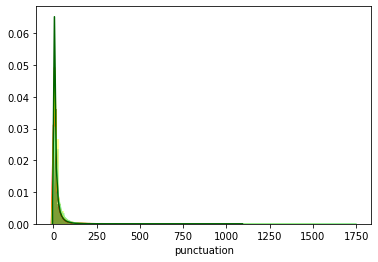

In [29]:
rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df.loc[rating1]['punctuation'], label='Rating 1', color='red')
sns.distplot(df.loc[rating2]['punctuation'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['punctuation'], label='Rating 3', color='yellow')
sns.distplot(df.loc[rating4]['punctuation'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['punctuation'], label='Rating 5', color='darkgreen')